# 1. Setup

## 1.1 Enter Virtual Environment

In [1]:
# create new virutalenvironment <thyroidenv> && set WD to <thyroidenv> && start <thyroidenv>
# !virtualenv /home/neekonsu/Thyroid-Clustering/thyroidenv && cd /home/neekonsu/Thyroid-Clustering/thyroidenv && source bin/activate

## 1.2 Import dependencies

<a href="https://colab.research.google.com/github/neekonsu/Thyroid-Clustering/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install prerequisite packages
!pip install --user scikit-learn matplotlib pandas numpy
# FORMAT MATPLOTLIB
%matplotlib notebook
import pprint
import pandas as pd
# for stats utils use sklearn
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
# for .gz extraction use gzip
import gzip
# for shell utils use shutil
import shutil
# for garbage collection use gc
import gc
# for dataframe use pandas
# import pandas as pd
# for basic plots use matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# for interfacing with filesystem use os
import os
# for execution progress bars use tqdm
from tqdm import tqdm
# for math utils use numpy
import numpy as np
# Force garbage collector (free unneeded RAM)
gc.collect()

0

## 1.3 Clear data repository and download from source

In [3]:
# # remove all existing files in filedump directory
# !rm "/srv/gsfs0/projects/snyder/neekonsu/*"
# # pull RNAseq from GTEx source
# # !wget "https://storage.googleapis.com/gtex_analysis_v7/rna_seq_data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz" -O "/srv/gsfs0/projects/snyder/neekonsu/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz"
# # collect garbage
# # gc.collect()

## 1.4 Unzip source

In [4]:
# # open data archive with gzip
# with gzip.open('/srv/gsfs0/projects/snyder/neekonsu/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz', 'rb') as f_in:
#     # open constituant data in write mode
#     with open('/srv/gsfs0/projects/snyder/neekonsu/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct', 'wb') as f_out:
#         # copy extracted file out of archive
#         shutil.copyfileobj(f_in, f_out)
# # collect garbage
# # gc.collect()
# # remove archive
# !rm "/srv/gsfs0/projects/snyder/neekonsu/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz"

# # collect garbage
# # gc.collect()

# 2 Sanitize data

## 2.2 Load source to pandas dataframe

In [5]:
# collect garbage
# gc.collect()
# read GTEx RNAseq (TPM) to dataframe <data>
data = pd.read_pickle('/srv/gsfs0/projects/snyder/neekonsu/database.pkl')
# Preview the first 5 lines of the loaded data 
# source = pd.read_pickle('/srv/gsfs0/projects/snyder/neekonsu/database.pkl')
data.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,0.10820,0.11580,0.02104,0.02329,0.00000,0.04641,0.03076,0.09358,...,0.09012,0.14620,0.10450,0.00000,0.6603,0.69500,0.12130,0.41690,0.23550,0.14500
1,ENSG00000227232.4,WASH7P,21.40000,11.03000,16.75000,8.17200,7.65800,9.37200,10.08000,13.56000,...,3.92600,13.13000,5.53700,5.78900,8.4390,7.84300,12.39000,12.53000,8.02700,12.76000
2,ENSG00000243485.2,MIR1302-11,0.16020,0.06433,0.04674,0.00000,0.05864,0.00000,0.13670,0.20790,...,0.08008,0.03607,0.00000,0.10590,0.0000,0.06432,0.05388,0.00000,0.04756,0.05367
3,ENSG00000237613.2,FAM138A,0.05045,0.00000,0.02945,0.03260,0.00000,0.00000,0.08610,0.13100,...,0.00000,0.06818,0.07309,0.03336,0.0000,0.08105,0.00000,0.05304,0.02996,0.03381
4,ENSG00000268020.2,OR4G4P,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.11080,0.05619,...,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.08739,0.00000,0.00000,0.04353


## 2.5 Drop textual fields

In [6]:
# collect garbage
# gc.collect()
# drop irrelevant attributes from dataframe such that <data> only stores numerical data
data.drop(["Name"],axis=1, inplace=True)
data.drop(["Description"],axis=1, inplace=True)
# Preview the first 5 lines of the loaded data 
# data.head()

## 2.7 Pull relevant (thyroid) fields

In [7]:
# construct [fields] to represent all relevant features (thyroid)
fields=[
"GTEX-111CU-0226-SM-5GZXC","GTEX-111FC-1026-SM-5GZX1",
"GTEX-111VG-0526-SM-5N9BW","GTEX-111YS-0726-SM-5GZY8","GTEX-1122O-0226-SM-5N9DA","GTEX-1128S-0126-SM-5H12S",
"GTEX-113JC-0126-SM-5EGJW","GTEX-117XS-0526-SM-5987Q","GTEX-117YW-0126-SM-5EGGN","GTEX-117YX-1226-SM-5H11S",
"GTEX-1192W-0126-SM-5EGGS","GTEX-1192X-1126-SM-5EGGU","GTEX-11DXX-0226-SM-5P9HL","GTEX-11DXY-0426-SM-5H12R",
"GTEX-11DXZ-0926-SM-5N9CG","GTEX-11DYG-0826-SM-5N9GH","GTEX-11DZ1-2726-SM-5A5KH","GTEX-11EI6-0726-SM-59866",
"GTEX-11EM3-0126-SM-5985K","GTEX-11EMC-0226-SM-5EGLP","GTEX-11EQ8-0826-SM-5N9FG","GTEX-11EQ9-0626-SM-5A5K1",
"GTEX-11GS4-0826-SM-5986J","GTEX-11GSO-0626-SM-5A5LW","GTEX-11I78-0526-SM-5986A","GTEX-11LCK-0526-SM-5A5M9",
"GTEX-11NSD-0126-SM-5987F","GTEX-11NUK-1026-SM-5HL5J","GTEX-11NV4-0626-SM-5N9BR","GTEX-11O72-2326-SM-5BC7H",
"GTEX-11OF3-0626-SM-5BC4Y","GTEX-11P7K-0226-SM-5986Z","GTEX-11P81-0126-SM-5HL5Y","GTEX-11P82-0226-SM-5HL4O",
"GTEX-11TT1-1126-SM-5P9GV","GTEX-11TTK-0826-SM-5N9EG","GTEX-11TUW-0226-SM-5LU8X","GTEX-11UD2-0626-SM-5GU6L",
"GTEX-11VI4-0226-SM-5GU6C","GTEX-11XUK-0226-SM-5EQLW","GTEX-11ZTS-1126-SM-5LU9X","GTEX-11ZTT-1026-SM-5EQKF",
"GTEX-11ZVC-0126-SM-5986G","GTEX-1211K-0726-SM-5FQUW","GTEX-1212Z-0426-SM-5FQT6","GTEX-12584-0826-SM-5FQSK",
"GTEX-12696-0326-SM-5EGL4","GTEX-1269C-0226-SM-5EGKS","GTEX-12BJ1-0426-SM-5FQSO","GTEX-12WSC-0826-SM-5EQ5Q",
"GTEX-12WSD-0926-SM-5GCNL","GTEX-12WSE-1226-SM-73KUF","GTEX-12WSG-0226-SM-5EGIF","GTEX-12WSH-0226-SM-5GCOG",
"GTEX-12WSJ-0326-SM-5GCMT","GTEX-12WSK-0926-SM-5CVNQ","GTEX-12WSL-0626-SM-5GCOY","GTEX-12WSN-0726-SM-5GCMS",
"GTEX-12ZZX-1226-SM-5EGHS","GTEX-12ZZY-0826-SM-5EQMT","GTEX-12ZZZ-1226-SM-59HK1","GTEX-13111-0226-SM-5EQ55",
"GTEX-13112-0326-SM-5P9IW","GTEX-13113-0126-SM-5LZVX","GTEX-1313W-0726-SM-5EGK1","GTEX-131XE-0126-SM-5LZVC",
"GTEX-131XF-1826-SM-5EGKG","GTEX-131XG-0226-SM-5IFG1","GTEX-131XH-0526-SM-5DUX7","GTEX-131YS-0726-SM-5P9G9",
"GTEX-132AR-1126-SM-5P9GA","GTEX-132NY-1026-SM-5P9IY","GTEX-132QS-0326-SM-5IJFN","GTEX-133LE-0326-SM-5P9G4",
"GTEX-1399R-0126-SM-5IFEV","GTEX-1399T-0126-SM-5KM15","GTEX-1399U-0326-SM-5P9G5","GTEX-139T6-0326-SM-5J2LY",
"GTEX-139TS-0126-SM-5K7XJ","GTEX-139UW-0126-SM-5KM1B","GTEX-139YR-1226-SM-5IFEU","GTEX-13CF3-0926-SM-5LZZC",
"GTEX-13D11-0226-SM-5LZXL","GTEX-13FH7-0126-SM-5KLZ1","GTEX-13FHO-0926-SM-5N9EW","GTEX-13FHP-0926-SM-5L3EC",
"GTEX-13FLV-0226-SM-5J2OF","GTEX-13FLW-0326-SM-5J2M4","GTEX-13FTW-0626-SM-5IFEX","GTEX-13FTY-0726-SM-5J2OH",
"GTEX-13FXS-0726-SM-5LZXJ","GTEX-13G51-1226-SM-5K7Z3","GTEX-13IVO-0926-SM-5KLZP","GTEX-13JVG-0926-SM-5IJE1",
"GTEX-13N11-1026-SM-5K7XQ","GTEX-13N1W-0826-SM-5MR5J","GTEX-13N2G-0726-SM-5MR38","GTEX-13NYB-0726-SM-5MR4J",
"GTEX-13NYC-2426-SM-5MR3K","GTEX-13NZ8-0226-SM-5J2OK","GTEX-13NZ9-1126-SM-5MR37","GTEX-13NZA-1026-SM-5MR48",
"GTEX-13O1R-0826-SM-5J2MB","GTEX-13O21-2226-SM-5MR3L","GTEX-13O3O-0926-SM-5KM1F","GTEX-13O3P-0726-SM-5J2OM",
"GTEX-13O3Q-0626-SM-5IJG1","GTEX-13O61-0226-SM-5KM52","GTEX-13OVG-0226-SM-5LU93","GTEX-13OVI-0826-SM-5KLZ8",
"GTEX-13OVJ-0626-SM-5J2O2","GTEX-13OVK-0226-SM-6M472","GTEX-13OW5-0626-SM-5J2N2","GTEX-13OW6-0726-SM-5L3FX",
"GTEX-13OW7-0826-SM-5L3EL","GTEX-13OW8-0126-SM-5IJE5","GTEX-13PDP-1026-SM-5L3FA","GTEX-13PL6-1026-SM-5L3E5",
"GTEX-13PVQ-0726-SM-5L3GI","GTEX-13PVR-0626-SM-5S2RC","GTEX-13QBU-0626-SM-5J2OG","GTEX-13QJ3-0926-SM-73KX5",
"GTEX-13QJC-0826-SM-5RQKC","GTEX-13RTJ-0326-SM-5YYAE","GTEX-13RTK-0326-SM-5RQHS","GTEX-13S86-1126-SM-5RQJX",
"GTEX-13U4I-0526-SM-5LU59","GTEX-13VXT-0626-SM-5SIA1","GTEX-13VXU-0826-SM-5KLZ2","GTEX-13W46-0926-SM-5LU3T",
"GTEX-13X6H-0526-SM-5LU4Q","GTEX-13X6J-0826-SM-5LU32","GTEX-13YAN-0926-SM-5O9C3","GTEX-144GL-1226-SM-5O9A4",
"GTEX-144GM-0226-SM-5Q5CB","GTEX-144GO-0126-SM-5LUAO","GTEX-145LT-0226-SM-5S2QK","GTEX-145LU-0426-SM-5O9AH",
"GTEX-145ME-0126-SM-5S2QM","GTEX-145MG-0826-SM-5Q5C2","GTEX-145MH-0426-SM-5LU8T","GTEX-145MI-1126-SM-5O9AK",
"GTEX-146FQ-0726-SM-5LUA7","GTEX-146FR-0326-SM-5SI8U","GTEX-14753-0926-SM-5Q5BI","GTEX-1477Z-0226-SM-5TDCI",
"GTEX-147F4-0826-SM-5QGRB","GTEX-147GR-0726-SM-5S2PL","GTEX-148VI-0526-SM-5TDDG","GTEX-148VJ-0726-SM-5LU8J",
"GTEX-1497J-0126-SM-5Q5BK","GTEX-14A5H-0726-SM-5Q5DW","GTEX-14A6H-2426-SM-5Q5BO","GTEX-14ABY-0926-SM-5Q5DY",
"GTEX-14AS3-0226-SM-5Q5B6","GTEX-14ASI-0726-SM-5Q5DC","GTEX-14B4R-0126-SM-5TDE4","GTEX-14BIN-0126-SM-5TDCG",
"GTEX-14BMU-0226-SM-5S2QA","GTEX-14BMV-0726-SM-73KVE","GTEX-14C38-0826-SM-5S2U8","GTEX-14C39-0226-SM-5TDDW",
"GTEX-14C5O-0826-SM-5TDEG","GTEX-14DAQ-0826-SM-73KWT","GTEX-14E6C-2626-SM-5RQJP","GTEX-14E6E-0326-SM-73KY6",
"GTEX-14E7W-0926-SM-5YYA4","GTEX-14ICK-1626-SM-6ETZX","GTEX-14ICL-0426-SM-5RQJ3","GTEX-14JIY-1226-SM-6871R",
"GTEX-14PHW-2926-SM-6AJBA","GTEX-14PII-0826-SM-6871S","GTEX-14PJ3-0126-SM-69LQP","GTEX-14PJ4-0326-SM-664OT",
"GTEX-14PJ6-0326-SM-6871H","GTEX-14PJM-1326-SM-664NX","GTEX-14PJO-0626-SM-6LLHH","GTEX-14PK6-0426-SM-6EU1J",
"GTEX-14PKU-0326-SM-6AJA7","GTEX-14PKV-0626-SM-6AJA2","GTEX-14PN3-0826-SM-69LOS","GTEX-14PN4-1526-SM-6871V",
"GTEX-14PQA-1226-SM-6M47A","GTEX-14XAO-0426-SM-6AJB6","GTEX-15CHC-0126-SM-5YYBA","GTEX-15CHQ-0826-SM-69LOT",
"GTEX-15CHR-1726-SM-7DUGW","GTEX-15D1Q-0626-SM-6AJAZ","GTEX-15DCZ-1226-SM-6871P","GTEX-15DDE-0626-SM-69LOK",
"GTEX-15DZA-0226-SM-7KFS6","GTEX-15EO6-0126-SM-6LPKJ","GTEX-15ER7-0726-SM-7KUMF","GTEX-15ETS-0526-SM-6PAN3",
"GTEX-15EU6-1426-SM-6M48E","GTEX-15FZZ-0226-SM-6LLI4","GTEX-15G19-0626-SM-6M474","GTEX-15G1A-0326-SM-6M467",
"GTEX-15RIE-0426-SM-7KUMH","GTEX-15RJ7-0326-SM-6M47H","GTEX-15RJE-1326-SM-6LPI6","GTEX-15SB6-1526-SM-7KUMQ",
"GTEX-15SHU-0726-SM-7KUFI","GTEX-15SHV-0426-SM-6M476","GTEX-15UF6-1126-SM-6LPJ3","GTEX-169BO-0326-SM-7EPIM",
"GTEX-16AAH-0326-SM-7DHML","GTEX-16BQI-0726-SM-6LPJZ","GTEX-16GPK-0926-SM-6LPJ9","GTEX-16MT8-0626-SM-6M47Q",
"GTEX-16MTA-0726-SM-7KUL4","GTEX-16NGA-0326-SM-718AJ","GTEX-16NPX-1426-SM-6LPK3","GTEX-16XZY-0726-SM-79OMU",
"GTEX-16XZZ-0826-SM-7IGM3","GTEX-16YQH-0326-SM-6LPJV","GTEX-16Z82-0426-SM-7EPGX","GTEX-178AV-0726-SM-6LPJI",
"GTEX-17EVP-0126-SM-7EPHW","GTEX-17EVQ-0526-SM-7KFSK","GTEX-17F96-0526-SM-79OLE","GTEX-17F97-0626-SM-7IGOH",
"GTEX-17F9E-0626-SM-79ON5","GTEX-17F9Y-0526-SM-7EWDC","GTEX-17HG3-0226-SM-7EWEA","GTEX-17HGU-0826-SM-7EWE5",
"GTEX-17HHE-0426-SM-79OK3","GTEX-17HHY-0826-SM-7EPID","GTEX-17HII-1926-SM-79OLB","GTEX-17JCI-0626-SM-7IGM7",
"GTEX-17KNJ-1026-SM-79ONK","GTEX-17MF6-0626-SM-7LT8D","GTEX-183FY-0626-SM-79OKR","GTEX-183WM-2626-SM-7KFRY",
"GTEX-18465-1426-SM-7KFTF","GTEX-18A66-0826-SM-72D5Z","GTEX-18A67-0826-SM-7KFTI","GTEX-18A6Q-0726-SM-7LT8Y",
"GTEX-18A7A-0826-SM-7KFTJ","GTEX-18D9A-0126-SM-7KFSI","GTEX-18D9B-0726-SM-72D6K","GTEX-18D9U-1026-SM-72D5R",
"GTEX-18QFQ-0726-SM-7LG6D","GTEX-1A3MV-0326-SM-73KW7","GTEX-1A8FM-0726-SM-7DUGK","GTEX-1A8G6-0626-SM-7IGNB",
"GTEX-1A8G7-1026-SM-73KVA","GTEX-1AMEY-0126-SM-73KTX","GTEX-1AMFI-0526-SM-7189M","GTEX-1AX8Z-0826-SM-7DUFZ",
"GTEX-1AX9I-0626-SM-72D54","GTEX-1AX9J-2126-SM-731DD","GTEX-1AX9K-0626-SM-73KVD","GTEX-1AYCT-0226-SM-73KVB",
"GTEX-1B8KE-0626-SM-7189H","GTEX-1B8KZ-0426-SM-731DP","GTEX-1B8L1-1626-SM-7IGMH","GTEX-1B8SF-0626-SM-73KVV",
"GTEX-1B8SG-1126-SM-7IGMT","GTEX-1B932-0926-SM-73KUP","GTEX-1B97I-0326-SM-7DUGB","GTEX-1BAJH-0926-SM-79OO6",
"GTEX-1C2JI-0326-SM-7EWFD","GTEX-1C4CL-0726-SM-7IGP9","GTEX-1C64N-1026-SM-79ONM","GTEX-1C6VR-0426-SM-7IGN6",
"GTEX-1C6VS-0826-SM-7EWEI","GTEX-1CAMQ-1126-SM-7EWFE","GTEX-1CAMR-0226-SM-7DUGO","GTEX-1CB4F-0826-SM-793CV",
"GTEX-1CB4H-0126-SM-7IGN2","GTEX-1CB4I-0726-SM-7DUGS","GTEX-1CB4J-1426-SM-7MKFR","GTEX-1EH9U-0926-SM-7EWF1",
"GTEX-1EKGG-0726-SM-7IGPX","GTEX-1EMGI-0826-SM-7EPHY","GTEX-1EN7A-1026-SM-7IGPZ","GTEX-N7MS-2326-SM-2HMLD",
"GTEX-NFK9-0726-SM-2HMJW","GTEX-OHPK-2626-SM-2HMK9","GTEX-OHPM-2626-SM-33HC5","GTEX-OIZG-0226-SM-2TC5L",
"GTEX-OIZI-0726-SM-2XCEI","GTEX-OOBJ-2626-SM-2I3F6","GTEX-OXRK-0626-SM-2HMJ5","GTEX-OXRL-2626-SM-2I3F1",
"GTEX-OXRO-1226-SM-48TDL","GTEX-OXRP-0326-SM-33HBJ","GTEX-P4PQ-2626-SM-33HC9","GTEX-P4QS-2626-SM-2I3EV",
"GTEX-P4QT-2626-SM-2I3FM","GTEX-P78B-0526-SM-2I5F7","GTEX-PLZ4-1226-SM-2I5FE","GTEX-POYW-0826-SM-2XCEM",
"GTEX-PWCY-2326-SM-2I3EQ","GTEX-PWN1-2626-SM-2I3FH","GTEX-PX3G-2626-SM-2I3EG","GTEX-Q2AG-0826-SM-2HMKF",
"GTEX-Q2AH-0726-SM-2I3EA","GTEX-Q2AI-0326-SM-2I3EK","GTEX-Q734-0526-SM-2I3EH","GTEX-QDVJ-0226-SM-2I5FV",
"GTEX-QDVN-0626-SM-2I3FP","GTEX-QEG5-0826-SM-2I5GF","GTEX-QEL4-0726-SM-3GIJ5","GTEX-QLQ7-0726-SM-2I5G2",
"GTEX-QV31-0726-SM-3GAEG","GTEX-QV44-0826-SM-2S1RG","GTEX-QXCU-0326-SM-2TC63","GTEX-R3RS-0726-SM-3GIJR",
"GTEX-R53T-0526-SM-3GADL","GTEX-R55C-0626-SM-2TF4Q","GTEX-R55E-0826-SM-2TC5M","GTEX-R55G-0726-SM-2TC6J",
"GTEX-REY6-0526-SM-2TF5M","GTEX-RM2N-0526-SM-2TF4N","GTEX-RN64-0626-SM-2TC5V","GTEX-RNOR-0926-SM-2TF56",
"GTEX-RTLS-0626-SM-5SI7Z","GTEX-RU1J-0226-SM-2TF5Y","GTEX-RU72-0126-SM-2TF6Z","GTEX-RUSQ-1026-SM-2TF6V",
"GTEX-RVPV-1226-SM-2TF73","GTEX-RWS6-0626-SM-2XCAS","GTEX-RWSA-0826-SM-2XCBF","GTEX-S32W-0726-SM-2XCBL",
"GTEX-S341-0226-SM-5S2VG","GTEX-S7SE-0726-SM-2XCD7","GTEX-S7SF-0226-SM-5SI7H","GTEX-SE5C-0726-SM-4BRWY",
"GTEX-SIU8-0626-SM-2XCDN","GTEX-SJXC-0726-SM-2XCFJ","GTEX-SN8G-1526-SM-4DM79","GTEX-SNOS-0226-SM-32PLR",
"GTEX-T2IS-0626-SM-32QP6","GTEX-T5JW-1226-SM-3GACY","GTEX-T6MN-0626-SM-32PM9","GTEX-T6MO-0226-SM-32QOL",
"GTEX-T8EM-0226-SM-3DB7C","GTEX-TKQ1-0126-SM-33HB3","GTEX-TMMY-0826-SM-33HB9","GTEX-TSE9-0626-SM-3DB8B",
"GTEX-U3ZM-0126-SM-3DB8M","GTEX-U3ZN-0326-SM-3DB86","GTEX-U4B1-0626-SM-3DB8L","GTEX-U8T8-2326-SM-3DB96",
"GTEX-UJMC-0326-SM-3GAE2","GTEX-V1D1-0926-SM-4JBHQ","GTEX-V955-0426-SM-3GAEL","GTEX-VJYA-0426-SM-3GIJK",
"GTEX-VUSG-0426-SM-3GIKD","GTEX-W5WG-1426-SM-4KKZP","GTEX-W5X1-0426-SM-3GILB","GTEX-WEY5-0526-SM-3GIKZ",
"GTEX-WFG7-0326-SM-5SI7L","GTEX-WFG8-0426-SM-3GILD","GTEX-WFJO-0226-SM-3GIKW","GTEX-WH7G-0526-SM-3NMBI",
"GTEX-WHPG-0226-SM-3NMB9","GTEX-WHSB-1626-SM-3LK6J","GTEX-WHSE-0626-SM-4RGNF","GTEX-WK11-0926-SM-3NMAU",
"GTEX-WL46-0126-SM-3TW8I","GTEX-WOFL-0726-SM-3MJG4","GTEX-WRHU-0926-SM-4E3IG","GTEX-WVLH-0626-SM-3MJG7",
"GTEX-WWYW-0826-SM-3NB2X","GTEX-WXYG-0226-SM-3NB2Y","GTEX-WY7C-0226-SM-3NB37","GTEX-WYBS-1926-SM-3NM8N",
"GTEX-WYJK-1626-SM-3NM9J","GTEX-WYVS-0326-SM-3NM9V","GTEX-X15G-0526-SM-3NMB7","GTEX-X4LF-0426-SM-3NMB5",
"GTEX-X4XX-0926-SM-46MV7","GTEX-X4XY-0826-SM-4E3JM","GTEX-X5EB-0726-SM-46MVR","GTEX-X8HC-0726-SM-46MWG",
"GTEX-XBED-0126-SM-47JY7","GTEX-XBEW-0126-SM-4AT66","GTEX-XGQ4-0426-SM-4AT4I","GTEX-XLM4-0726-SM-4AT64",
"GTEX-XMK1-0626-SM-4B65A","GTEX-XUW1-1026-SM-4BONY","GTEX-XUZC-0126-SM-4BOO6","GTEX-XV7Q-0326-SM-4BRVM",
"GTEX-XXEK-1326-SM-4BRV1","GTEX-XYKS-0826-SM-4BRVF","GTEX-Y111-1926-SM-4SOIS","GTEX-Y114-0626-SM-4TT98",
"GTEX-Y3I4-0226-SM-4TT27","GTEX-Y3IK-0526-SM-4WWE3","GTEX-Y5LM-0626-SM-4V6G4","GTEX-Y5V5-0326-SM-5RQJG",
"GTEX-Y5V6-0526-SM-4VBRV","GTEX-Y8E4-0126-SM-4VBQ2","GTEX-Y9LG-0426-SM-4VBRT","GTEX-YB5E-0626-SM-4VDSE",
"GTEX-YB5K-0526-SM-5LUAS","GTEX-YEC3-0826-SM-4WWFP","GTEX-YEC4-0626-SM-5CVLU","GTEX-YF7O-0726-SM-4W213",
"GTEX-YFC4-2626-SM-5P9FQ","GTEX-YFCO-0326-SM-4W1ZP","GTEX-YJ89-0726-SM-5P9F7","GTEX-Z9EW-0226-SM-5CVM7",
"GTEX-ZA64-0426-SM-5HL96","GTEX-ZAB5-0726-SM-5P9JG","GTEX-ZAJG-0726-SM-5HL9A","GTEX-ZAK1-0726-SM-5HL8Q",
"GTEX-ZC5H-0626-SM-5LU9K","GTEX-ZDTS-0926-SM-5YY9D","GTEX-ZDYS-0626-SM-5J2N5","GTEX-ZE7O-1126-SM-57WC8",
"GTEX-ZF28-0826-SM-4WKGJ","GTEX-ZGAY-1026-SM-4WWBR","GTEX-ZLFU-0626-SM-4WWBO","GTEX-ZLV1-0126-SM-4WWBZ",
"GTEX-ZLWG-0526-SM-4WWFB","GTEX-ZPCL-0126-SM-4WWC8","GTEX-ZPU1-0426-SM-4WWCA","GTEX-ZQG8-0926-SM-57WFF",
"GTEX-ZQUD-0126-SM-7EPIS","GTEX-ZT9W-0226-SM-4YCCZ","GTEX-ZT9X-0226-SM-51MT2","GTEX-ZTPG-0826-SM-5DUVC",
"GTEX-ZTSS-0226-SM-59877","GTEX-ZTX8-0626-SM-59HKC","GTEX-ZUA1-0926-SM-4YCDX","GTEX-ZV6S-0226-SM-59HJT",
"GTEX-ZV7C-0126-SM-57WDE","GTEX-ZVP2-0426-SM-57WC2","GTEX-ZVT3-0726-SM-5GICN","GTEX-ZVZP-1026-SM-5GICI",
"GTEX-ZVZQ-0626-SM-59HJU","GTEX-ZXG5-0926-SM-5NQ8H","GTEX-ZY6K-0226-SM-5SIAY","GTEX-ZYFC-0926-SM-5GZWW",
"GTEX-ZYFD-0826-SM-5NQ9A","GTEX-ZYFG-0626-SM-5GZYA","GTEX-ZYT6-0426-SM-5GID3","GTEX-ZYVF-1126-SM-5E458",
"GTEX-ZYW4-1126-SM-5SI99","GTEX-ZYY3-1926-SM-5GZXS","GTEX-ZZ64-0126-SM-5GZXA","GTEX-ZZPU-1326-SM-5GZWS",
]

red_marked = [
"GTEX-111VG-0526-SM-5N9BW","GTEX-117YW-0126-SM-5EGGN","GTEX-11DXY-0426-SM-5H12R",
"GTEX-11EQ8-0826-SM-5N9FG","GTEX-11EQ9-0626-SM-5A5K1","GTEX-11GS4-0826-SM-5986J","GTEX-11GSP-0126-SM-5A5KU",
"GTEX-11I78-0526-SM-5986A","GTEX-11NV4-0626-SM-5N9BR","GTEX-11XUK-0226-SM-5EQLW","GTEX-11ZTS-1126-SM-5LU9X",
"GTEX-1211K-0726-SM-5FQUW","GTEX-12BJ1-0426-SM-5FQSO","GTEX-12WSB-0726-SM-5N9GD","GTEX-12WSG-0226-SM-5EGIF",
"GTEX-12ZZX-1226-SM-5EGHS","GTEX-12ZZY-0826-SM-5EQMT","GTEX-13113-0126-SM-5LZVX","GTEX-131XF-1826-SM-5EGKG",
"GTEX-131YS-0726-SM-5P9G9","GTEX-139UW-0126-SM-5KM1B","GTEX-13D11-0226-SM-5LZXL","GTEX-13FH7-0126-SM-5KLZ1",
"GTEX-13FHO-0926-SM-5N9EW","GTEX-13FXS-0726-SM-5LZXJ","GTEX-13NYC-2426-SM-5MR3K","GTEX-13NZ9-1126-SM-5MR37",
"GTEX-13O1R-0826-SM-5J2MB","GTEX-13QJC-0826-SM-5RQKC","GTEX-144FL-2326-SM-5LUAC","GTEX-14ABY-0926-SM-5Q5DY",
"GTEX-14AS3-0226-SM-5Q5B6","GTEX-14BIN-0126-SM-5TDCG","GTEX-14BMU-0226-SM-5S2QA","GTEX-14PJ4-0326-SM-664OT",
"GTEX-14PJ6-0326-SM-6871H","GTEX-14PJM-1326-SM-664NX","GTEX-15D1Q-0626-SM-6AJAZ","GTEX-15FZZ-0226-SM-6LLI4",
"GTEX-16AAH-0326-SM-7DHML","GTEX-16NGA-0326-SM-718AJ","GTEX-178AV-0726-SM-6LPJI","GTEX-17EVP-0126-SM-7EPHW",
"GTEX-17HG3-0226-SM-7EWEA","GTEX-18A67-0826-SM-7KFTI","GTEX-1AX8Y-0126-SM-731FE","GTEX-1AX8Z-0826-SM-7DUFZ",
"GTEX-1B8KZ-0426-SM-731DP","GTEX-OHPK-2626-SM-2D457","GTEX-OHPK-2626-SM-2HMK9","GTEX-OHPL-2626-SM-2AXUT",
"GTEX-OHPL-2626-SM-2HMJA","GTEX-OOBJ-2626-SM-2D44W","GTEX-OOBJ-2626-SM-2I3F6","GTEX-PLZ4-1226-SM-2I5FE",
"GTEX-PLZ4-1226-SM-2M48Q","GTEX-PWCY-2326-SM-2I3EQ","GTEX-PWCY-2326-SM-2IZIF","GTEX-QEL4-0726-SM-2TWCQ",
"GTEX-QEL4-0726-SM-3GIJ5","GTEX-R55G-0726-SM-2TC6J","GTEX-R55G-0726-SM-2TWCM","GTEX-RM2N-0526-SM-2TF4N",
"GTEX-RM2N-0526-SM-2TO66","GTEX-S32W-0726-SM-2XCBL","GTEX-S32W-0726-SM-2XUAY","GTEX-S32W-0726-SM-5S2T3",
"GTEX-S341-0226-SM-2XCAX","GTEX-S341-0226-SM-2XU9O","GTEX-S341-0226-SM-5S2VG","GTEX-S4Q7-0326-SM-3K2B1",
"GTEX-S4UY-0626-SM-2XUAQ","GTEX-S4UY-0626-SM-3K2AO","GTEX-T5JW-1226-SM-3GACY","GTEX-TKQ1-0126-SM-33HB3",
"GTEX-TMMY-0826-SM-33HB9","GTEX-TSE9-0626-SM-3DB8B","GTEX-U3ZH-0226-SM-3DB7B","GTEX-V955-0426-SM-3GAEL",
"GTEX-W5WG-1426-SM-4KKZP","GTEX-WI4N-0926-SM-3LK7K","GTEX-WYBS-1926-SM-3NM8N","GTEX-WYVS-0326-SM-3NM9V",
"GTEX-Y3IK-0526-SM-4WWE3","GTEX-Y5V6-0526-SM-4VBRV","GTEX-YFC4-2626-SM-5P9FQ","GTEX-YJ89-0726-SM-5P9F7",
"GTEX-ZLV1-0126-SM-4WWBZ","GTEX-ZYVF-1126-SM-5E458","GTEX-ZYY3-1926-SM-5GZXS","GTEX-ZZPU-1326-SM-5GZWS"
]
# set batch to all <data> including [fields] => creates dataframe of excl. thyroid data
batch = data[fields]
kpca_batch = data[fields].transpose()

# 3 Preview data

## 3.1 plot data

In [8]:
# transpose dataframes such that features are rows not columns
batchT = batch.transpose()

In [9]:
scaler = StandardScaler()
batch = scaler.fit_transform(batch)
batchT = scaler.fit_transform(batchT)
kpca_batch_standardized = scaler.fit_transform(kpca_batch)

In [10]:
pca = PCA(n_components=2)
Y = pca.fit_transform(batch)
YT = pca.fit_transform(batchT)

In [11]:
YT.shape

(446, 2)

In [12]:
indices = []
nindices = []
for i in range(0,446):
    nindices.append(i)
for i in red_marked:
    try:
        indices.append(fields.index(i))
    except:
        continue
for i in sorted(indices, reverse=True):
    del nindices[i]

<IPython.core.display.Javascript object>


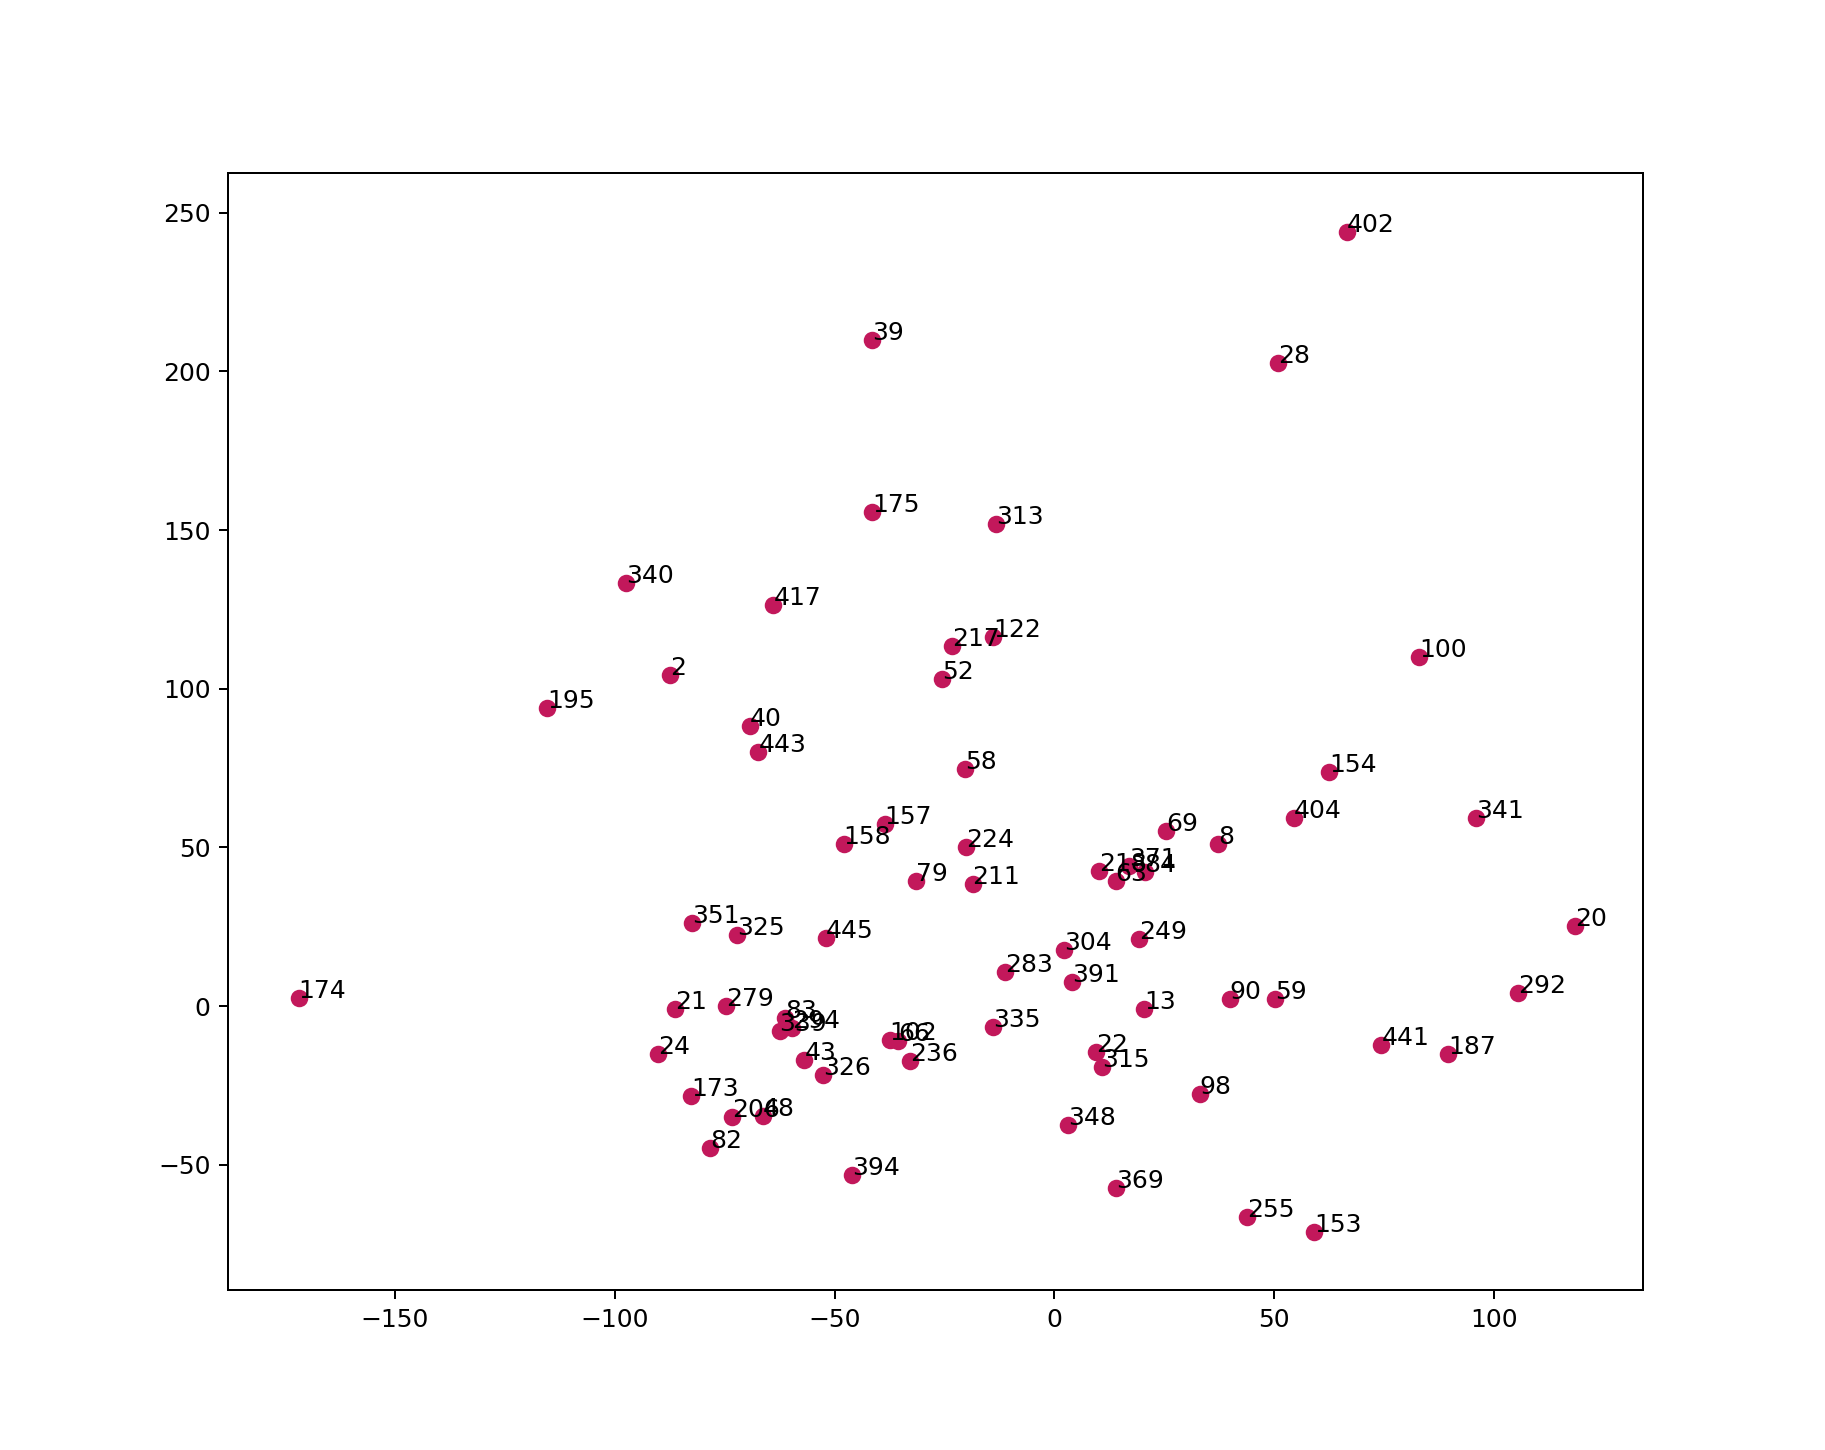

In [13]:
gc.collect()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in indices:
    ax.scatter(YT[i,0], YT[i,1], color="#c2185b")
    ax.text(YT[i,0], YT[i,1], str(i))
# ax.scatter(red[:,0], red[:,1], color="#c2185b")
# ax.scatter(not_red[:,0], red[:,1], color="#42a5f5")

# for x, y, group in zip(x_seq, y_seq, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.show()

<IPython.core.display.Javascript object>


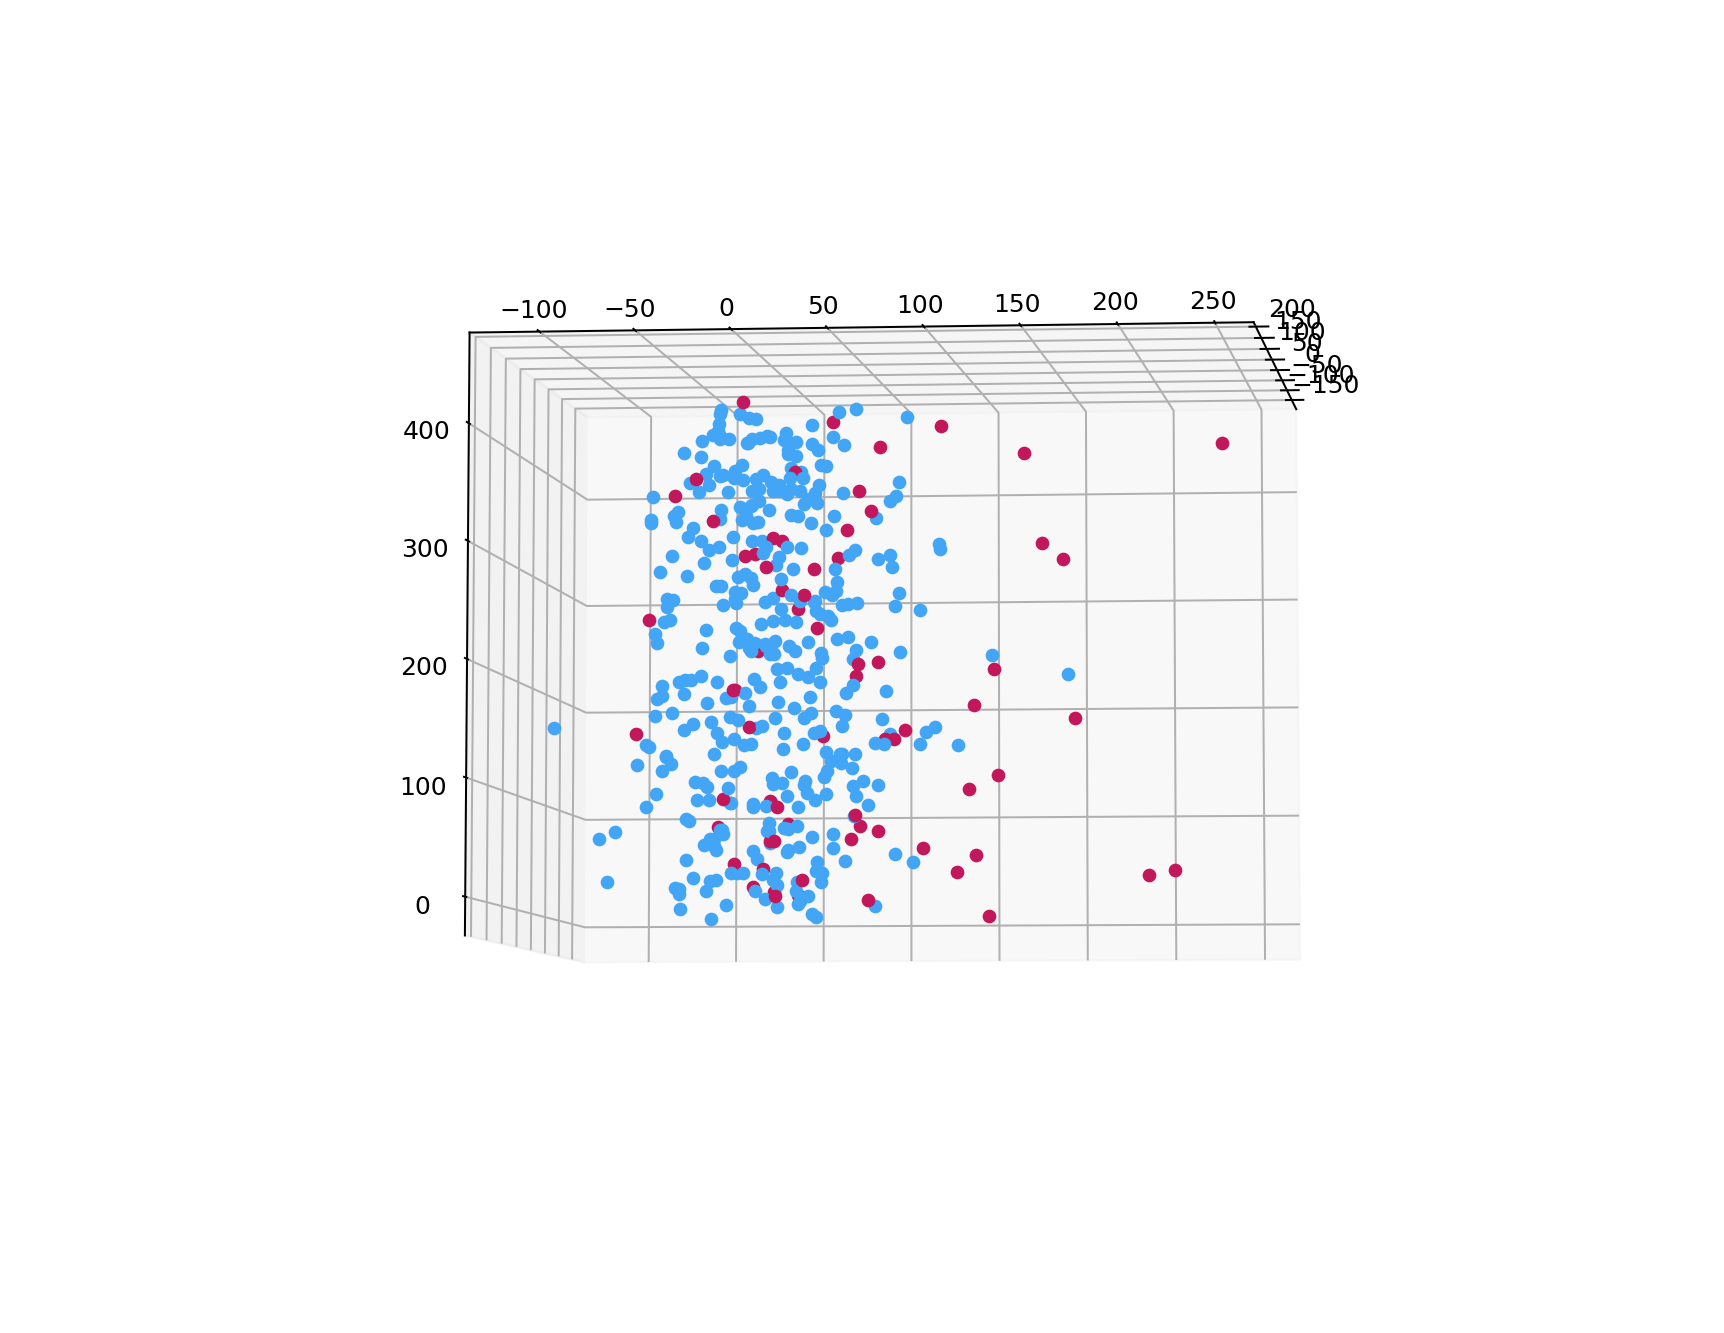

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in indices:
    ax.scatter(YT[i,0], YT[i,1], i, color="#c2185b")
for i in nindices:
    ax.scatter(YT[i,0], YT[i,1], i, color="#42a5f5")
# ax.scatter(red[:,0], red[:,1], color="#c2185b")
# ax.scatter(not_red[:,0], red[:,1], color="#42a5f5")

# for x, y, group in zip(x_seq, y_seq, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.show()

<IPython.core.display.Javascript object>


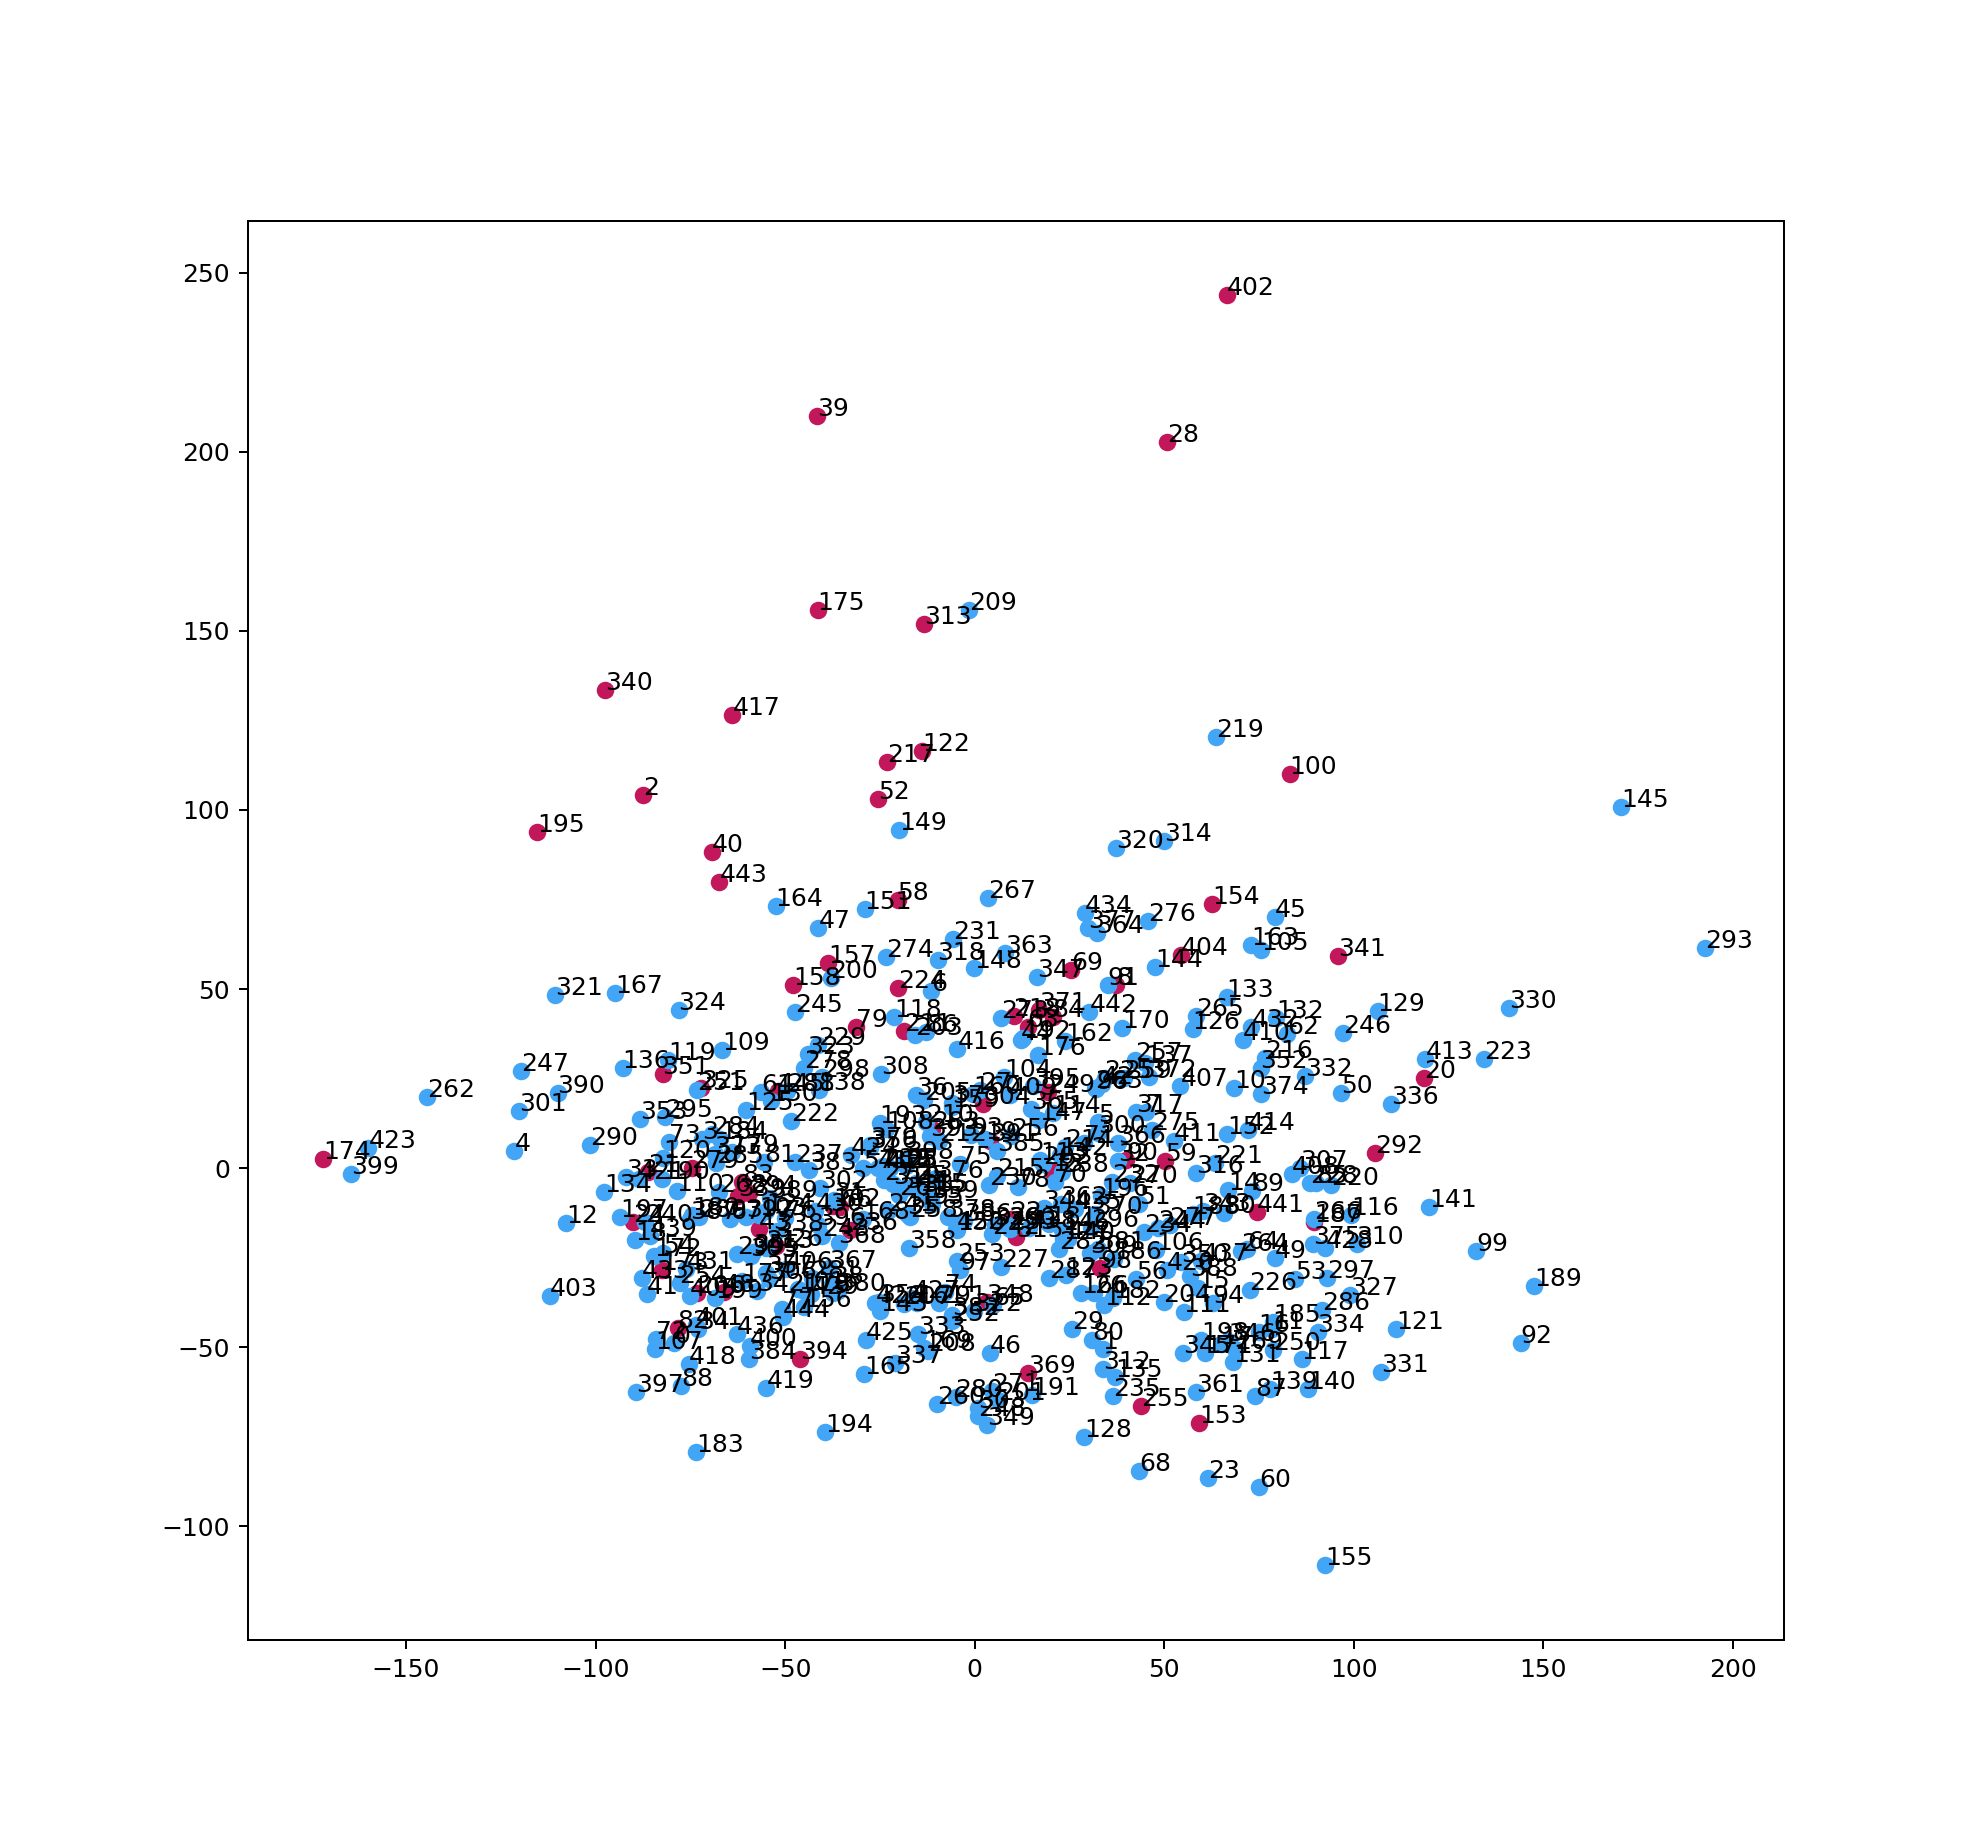

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in indices:
    ax.scatter(YT[i,0], YT[i,1], color="#c2185b")
    ax.text(YT[i,0], YT[i,1], str(i))
for i in nindices:
    ax.scatter(YT[i,0], YT[i,1], color="#42a5f5")
    ax.text(YT[i,0], YT[i,1], str(i))
# ax.scatter(red[:,0], red[:,1], color="#c2185b")
# ax.scatter(not_red[:,0], red[:,1], color="#42a5f5")

# for x, y, group in zip(x_seq, y_seq, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.show()

<IPython.core.display.Javascript object>


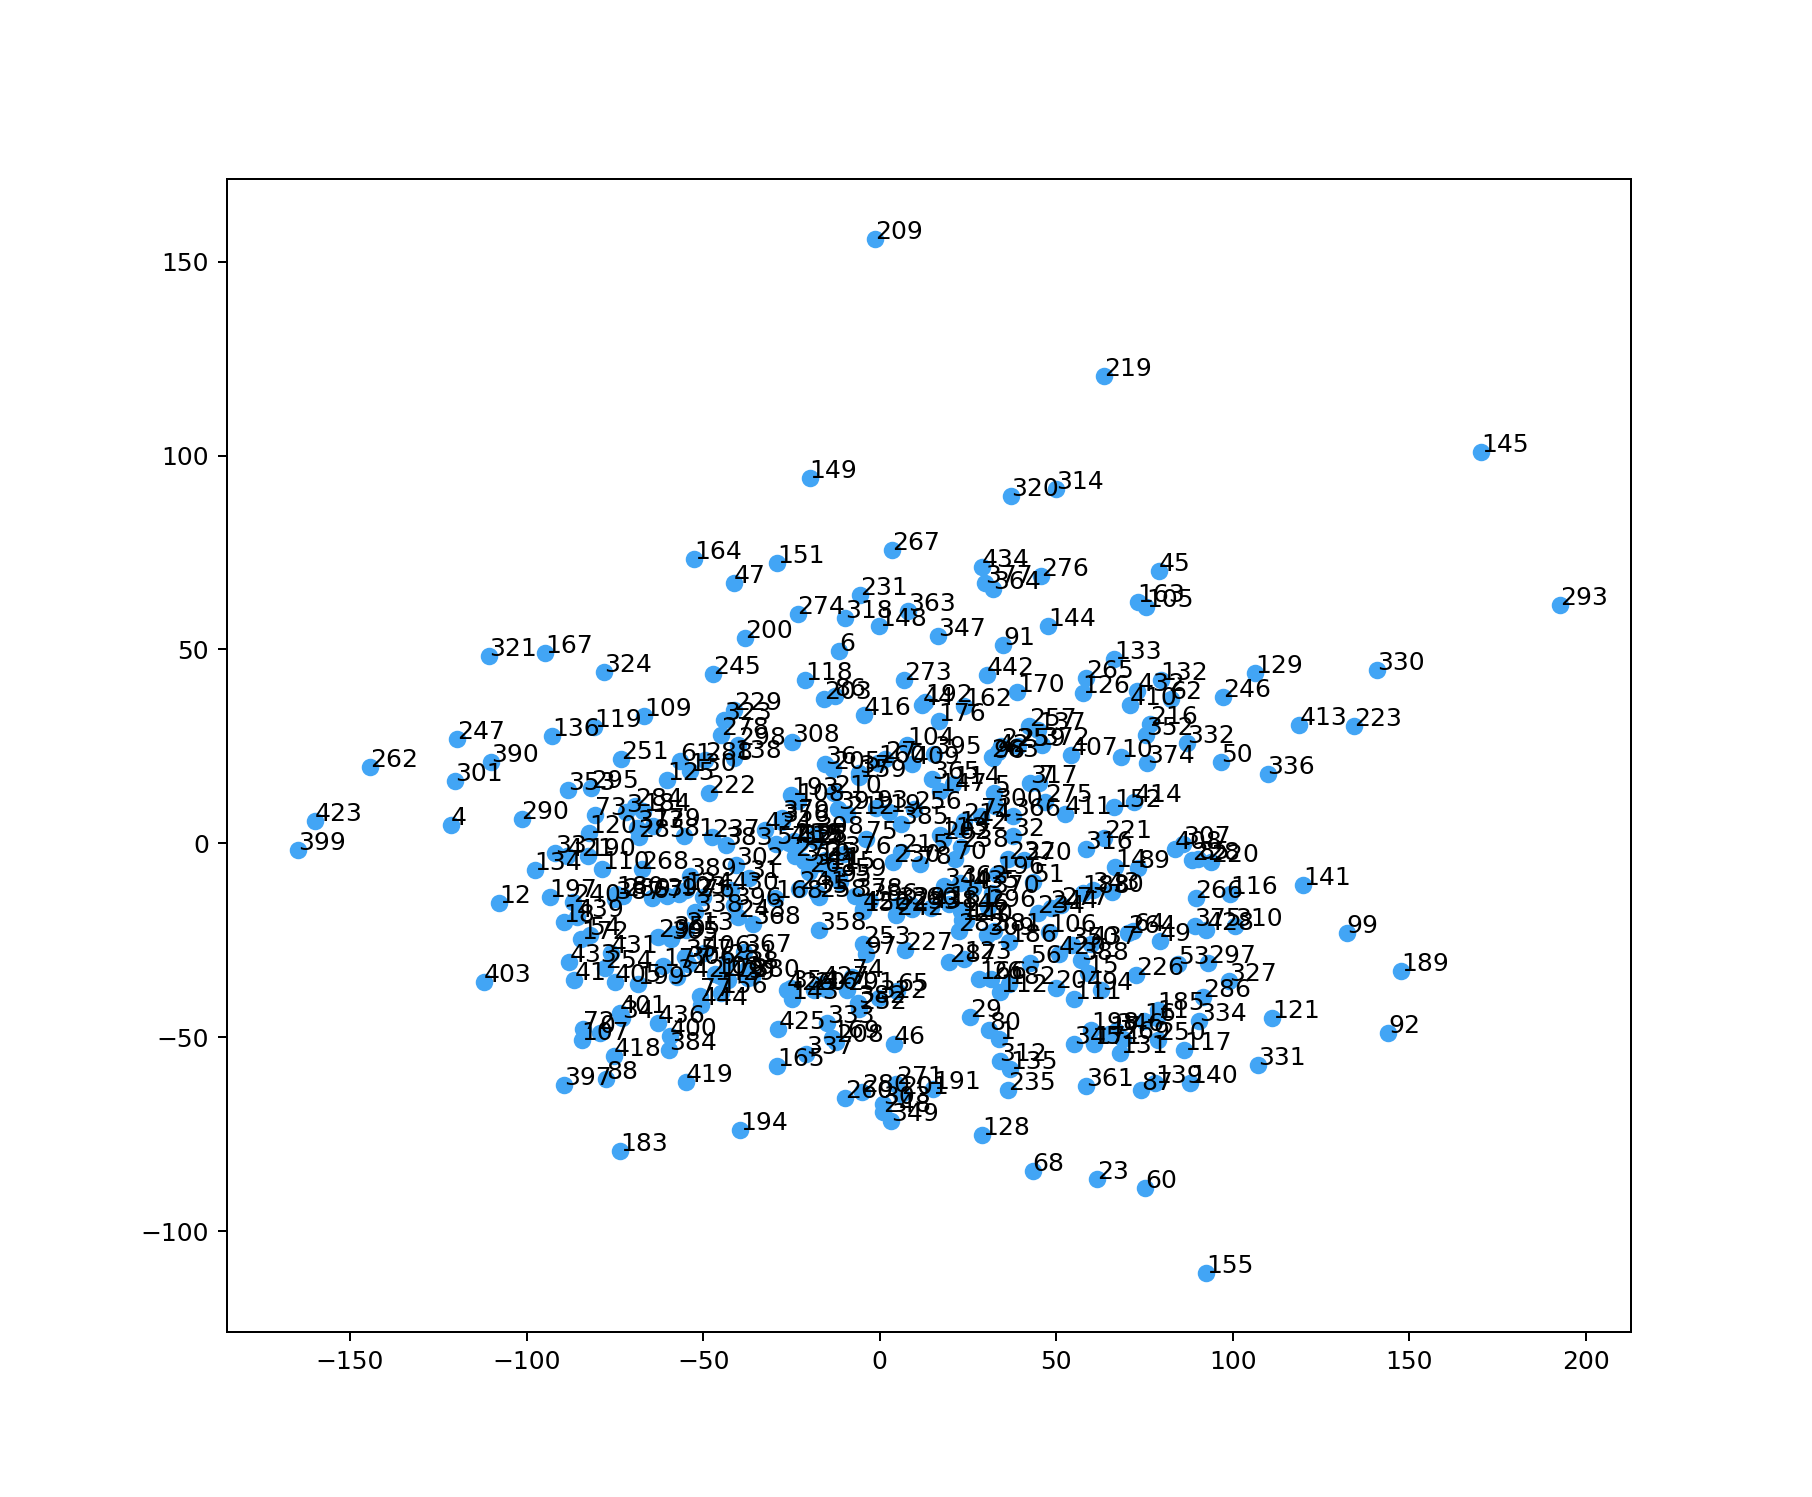

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in nindices:
    ax.scatter(YT[i,0], YT[i,1], color="#42a5f5")
    ax.text(YT[i,0], YT[i,1], str(i))
# ax.scatter(red[:,0], red[:,1], color="#c2185b")
# ax.scatter(not_red[:,0], red[:,1], color="#42a5f5")

# for x, y, group in zip(x_seq, y_seq, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.show()

In [33]:
kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10)
KPCA_A = kpca.fit_transform(kpca_batch_standardized)
#[91, 90, 99, 98, 100]

<IPython.core.display.Javascript object>


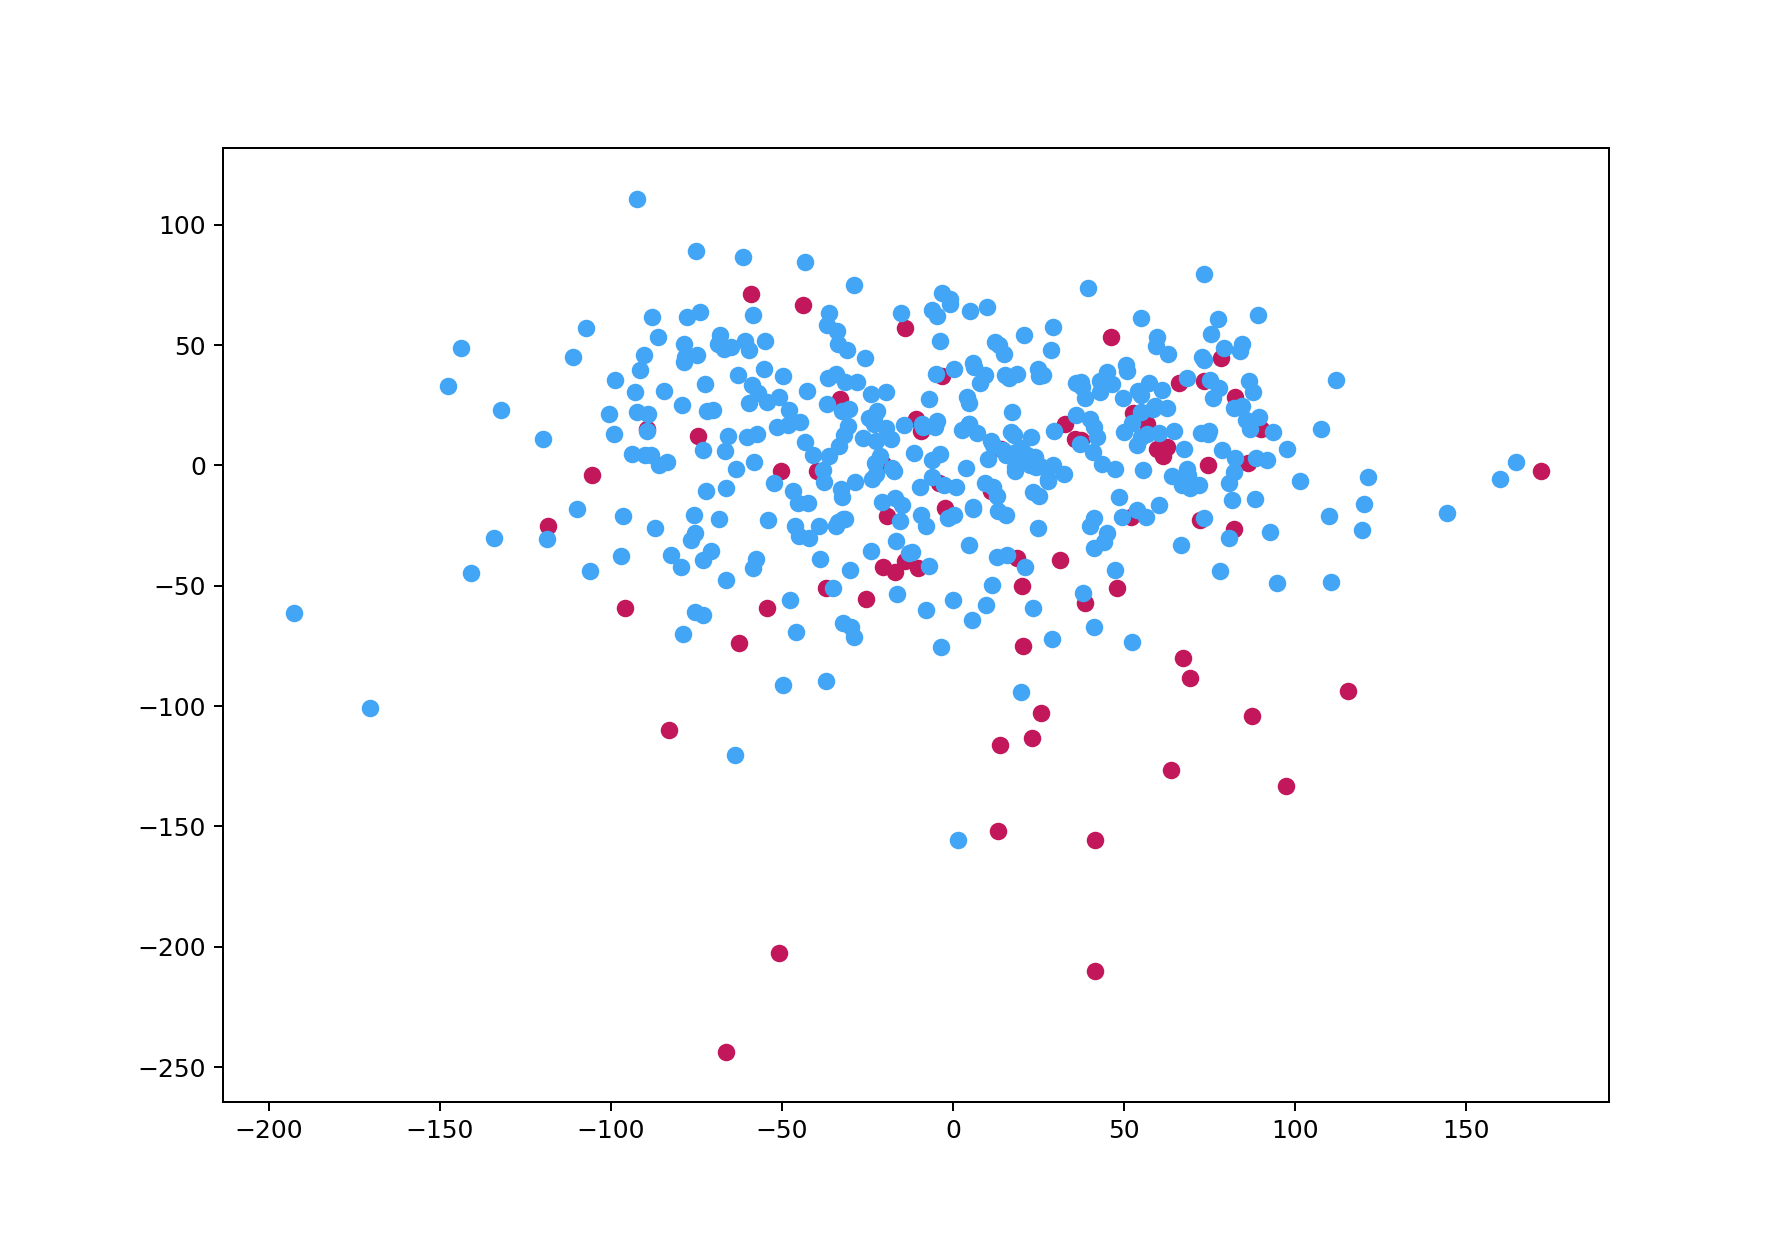

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in indices:
    ax.scatter(KPCA_A[i,0], KPCA_A[i,1], color="#c2185b")
#     ax.text(KPCA_A[i,0], KPCA_A[i,1], str(i))
for i in nindices:
    ax.scatter(KPCA_A[i,0], KPCA_A[i,1], color="#42a5f5")
#     ax.text(KPCA_A[i,0], KPCA_A[i,1], str(i))
# ax.scatter(red[:,0], red[:,1], color="#c2185b")
# ax.scatter(not_red[:,0], red[:,1], color="#42a5f5")

# for x, y, group in zip(x_seq, y_seq, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.show()